In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [31]:
df = pd.read_csv('Wuzzuf_Jobs.csv')
df.head(5)

,Title,Company,Location,Type,Level,YearsExp,Country,Skills
0,Customer Service Agent,Johnson Controls,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Call Center, Customer Support, Customer Care, ..."
1,Marketing Manager,SYE English Community,Dokki,Full Time,Manager,5-10 Yrs of Exp,Giza,"Market Research, Social Media, Online Marketin..."
2,Medical Representative Heliopolis,So Value Pharma,Cairo,Full Time,Entry Level,0-5 Yrs of Exp,Egypt,"Cardio-metabolic, Sales Skills, Sales Target, ..."
3,Order Handling Specialist,Johnson Controls,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"Supply Officer, Supply Planner, Procurement an..."
4,Storekeeper,Confidential,Cairo,Full Time,Experienced,3+ Yrs of Exp,Egypt,"Warehousing, Storekeeping, Logistics/Supply Chain"


### 1. Factorize the YearsExp feature and convert it to numbers in new col.

In [32]:
df['factorized_YearsExp'] = pd.factorize(df['YearsExp'])[0]
df.sample(5)

,Title,Company,Location,Type,Level,YearsExp,Country,Skills,factorized_YearsExp
4167,HR Generalist,AFKAR Technology,New Cairo,Internship,Entry Level,0-1 Yrs of Exp,Cairo,"Research, Human Resources (HR), Recruitment, I...",28
3445,HR Specialist,Scoop Production,Haram,Full Time,Experienced,2-5 Yrs of Exp,Giza,"Recruitment, Personnel, Microsoft Office, HR, ...",17
2072,Sales Specialist - New Cairo,"General Star Business Development Co.,(Egypt)",New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"Sales Skills, Sales Target, Customer Service, ...",3
3934,Accountant,Clini Lab,Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Egypt,"Accounting, Finance, Financial Analysis, Finan...",0
3254,Google Analytics & Google Tag Specialist,Deal,Alexandria,Full Time,Part Time,1+ Yrs of Exp,Egypt,"1+ Yrs of Exp, SEO, Digital Marketing, Social ...",5


### 2. Apply K-means for job title and companies

In [33]:
df['Title'] = pd.factorize(df['Title'])[0]
df['Company'] = pd.factorize(df['Company'])[0]
df.sample(5)

,Title,Company,Location,Type,Level,YearsExp,Country,Skills,factorized_YearsExp
738,591,385,Mohandessin,Full Time,Experienced,5-7 Yrs of Exp,Giza,"Warehouse, Warehousing, Supply Chain, Logistic...",14
2406,1770,1010,Maadi,Full Time,Experienced,3+ Yrs of Exp,Cairo,"Admin Work, Admin Assistant, Office Management...",4
702,443,372,Nasr City,Full Time,Experienced,4+ Yrs of Exp,Cairo,"Information Technology (IT), HW, Computer Scie...",15
3799,2621,733,New Cairo,Full Time,Experienced,8-20 Yrs of Exp,Cairo,"Administration, Civil Engineering, Constructio...",97
1156,903,76,Mohandessin,Full Time,Experienced,3-7 Yrs of Exp,Giza,"ITI, English, Articulate, Creative/Design/Art",49


In [34]:
#seperate them in 2 columns
X = df.iloc[:, [0, 1]].values
X.view()

array([[   0,    0],
       [   1,    1],
       [   2,    2],
       ...,
       [2963, 1533],
       [2048,  133],
       [2964, 1533]], dtype=int64)

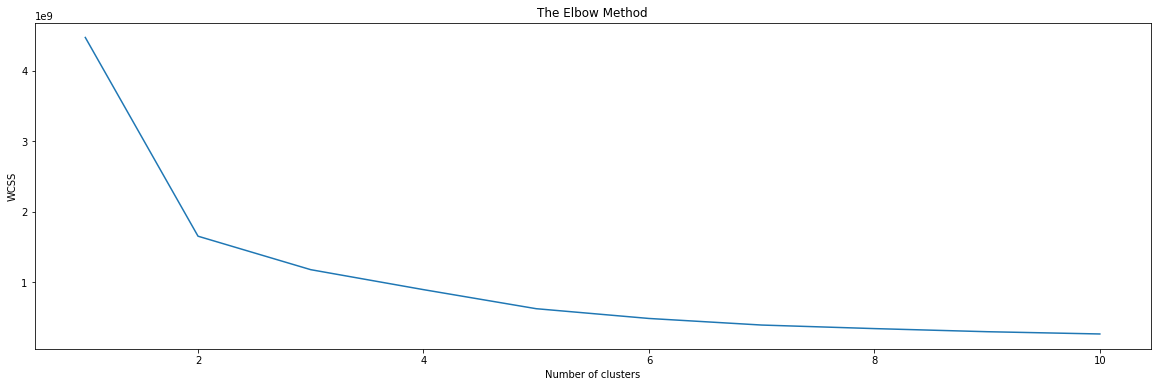

In [35]:
## Using the elbow method to find the optimal number of clusters(k-numbers):
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.subplots(figsize=(20, 6))   
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
# Fitting K-Means to the data:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
y_kmeans == 0

array([ True,  True,  True, ..., False, False, False])

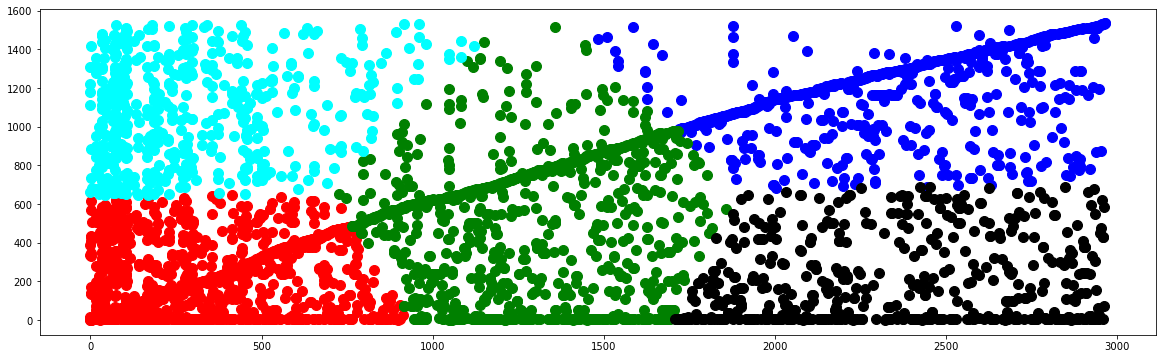

In [37]:
#distincting each cluster:
plt.subplots(figsize=(20, 6)) 
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'black', label = 'Cluster 5')

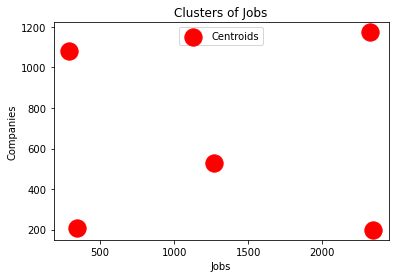

In [38]:
#Visulazing the clusters:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters of Jobs')
plt.xlabel('Jobs')
plt.ylabel('Companies')
plt.legend(loc='upper center')
plt.show()        